# **Práctica Final Lucía Díaz-Mor, Víctor Encinas y Román Merino**

# 1. Dataset

Realizamos la apertura del excel en google colab, nombrandole como data y transformandole para su utilidad en colab. Así mismo abrimos y descargamos todas las librerias necesarias para el desarrollo del trabajo

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.8 MB/s 


In [ ]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Practica Final/NCDB_1999_to_2014.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [ ]:
data.columns = data.columns.map(lambda x: x[:].lower())
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [ ]:
data[data['c_mnth'].str.contains('[^0-9]')|
         data['c_wday'].str.contains('[^0-9]')|
         data['c_hour'].str.contains('[^0-9]')]

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
128,1999,1,1,UU,2,02,33,02,1,1,...,01,06,1990,01,M,57,11,1,02,1
129,1999,1,1,UU,2,02,33,02,1,1,...,02,01,1991,01,M,18,11,2,02,1
175,1999,1,1,UU,2,01,03,UU,1,4,...,01,01,1989,01,M,30,11,2,02,1
176,1999,1,1,UU,2,01,03,UU,1,4,...,01,01,1989,02,M,29,13,2,02,2
177,1999,1,1,UU,2,01,03,UU,1,4,...,01,01,1989,03,M,01,21,2,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


# 2. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

Para esto hemos decidido, realizar los estudios por separado, yendo variable por variable de las referidas a tipo de vehiculo y conductor y viendo en cada una de estas cual es el perfil de conductor que mas accidentes tiene, sean del tipo que sean los accidentes

##2.1 Número de accidentes por tipo de vehículo


Lo primero que hacemos es extraer, unicamente los datos de v_type, es decir, los referidos al tipo de vehiculo implicado en cualquier tipo de accidente, para eso los extraemos en una sola tabla usando un value_counts y ponderandolos sobre un 100%

In [ ]:
Type = data['v_type']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Typecount = data['v_type'].value_counts().reset_index()
Typemerge = pd.merge(Type, Typecount, on=['index'], how='inner')
Typemerge

,index,percent,v_type
0,01,82.372976,4827390
1,NN,3.889032,227913
2,06,2.994520,175491
3,17,2.097244,122907
4,14,2.094292,122734
5,07,1.502575,88057
6,08,1.203944,70556
7,05,1.128011,66106
8,11,0.874684,51260
9,UU,0.507712,29754


Ahora, usaremos la función plot para así poder representar de manera gráfica los datos previamente extraidos, usamos mas concretamente un histograma.
Como podemos observar, la mayoria de los accidentes vienen de coches de tipo uno, es decir, coche ligeros o utilitarios, seguidos muy de lejos del resto.

In [ ]:
import plotly.express as px
plotType = px.histogram(Typemerge, x="index", y=['percent'])
plotType.show()

Ahora, extraemos solamento los tres tipos de coches mas involucrados en accidentes, con la finalidad de tenerlos de una forma mas aislada y clara, simplemente los extraemos de la tabla previamente extraida de solo v_type. lo visualizamos con un shape

In [ ]:
Typedata = data[(data['v_type']=='01') | 
                  (data['v_type']=='NN') | 
                  (data['v_type']=='06')]
Typedata.shape

(5230794, 22)

Igual que haciamos antes, estos datos los representamos gráficamente mediante counts, y los ponderamos al 100%, lo cual no hace referencia a la visión real pero si nos permite hacernos una idea gráfica de la proporción de estos tres primeros. Observamos, que dentro de los tres tipos mas accidentados, mas del 90% procede de utilitarios, como previamente resaltabamos, muy lejos del tipo UU, modelos especiales de peatones y del 06, perteneciente a furgonetas y camiones de delivery y reparto de paqueteria

In [ ]:
plotTypedata = Typedata['v_type']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotTypedata

,index,percent
0,01,92.287901
1,NN,4.357140
2,06,3.354959


In [ ]:
plotTypecount1 = Typedata['v_type'].value_counts().reset_index()
plotTypemerge1 = pd.merge(plotTypedata, 
                                  plotTypecount1, on=['index'], how='inner')

De la misma forma, usamos un histograma para poder ver estos datos de forma mas detallada y gráfica

In [ ]:
plotType2 = px.histogram(plotTypemerge1, x="index", y=['percent'], title = 'tipo vehiculo')
plotType2.show()

##2.2 Accidentes por antigüedad del vehículo

Haremos lo mismo que en el 2.1, pero esta vez usando v_year, variable referida a los años de los vehiculos accidentados

In [ ]:
Year = data['v_year']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Yearcount = data['v_year'].value_counts().reset_index()
Yearmerge = pd.merge(Year, Yearcount, on=['index'], how='inner')
Yearmerge

,index,percent,v_year
0,UUUU,5.530710,324122
1,2000,5.514687,323183
2,1998,5.039089,295311
3,2002,5.008766,293534
4,1999,4.908193,287640
...,...,...,...
111,1907,0.000034,2
112,1904,0.000034,2
113,1909,0.000034,2
114,1910,0.000017,1


Observamos que de los vehiculos mas accidentados, no se tienen datos del año de matriculación del vehiculo, pero que estos estan muy segidos de los vehiculos de 1998 y 1999, los siguientes mas accidentados

In [ ]:
import plotly.express as px
plotYear = px.histogram(Yearmerge, x="index", y=['percent'])
plotYear.show()

In [ ]:
Yeardata = data[(data['v_year']=='UUUU') | 
                  (data['v_year']=='1998') | 
                  (data['v_year']=='1999')]
Yeardata.shape

(907073, 22)

In [ ]:
plotYeardata = Yeardata['v_year']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotYeardata

,index,percent
0,UUUU,35.732736
1,1998,32.556476
2,1999,31.710788


In [ ]:
plotYearcount1 = Yeardata['v_year'].value_counts().reset_index()
plotYearmerge1 = pd.merge(plotYeardata, 
                                  plotYearcount1, on=['index'], how='inner')

In [ ]:
plotYear2 = px.histogram(plotYearmerge1, x="index", y=['percent'], title = 'año vehiculo')
plotYear2.show()

##2.3 Edad del conductor

Realizamos lo mismo que en el 2.1, pero esta vez usango p_age, variable que hace referencia a la edad del conductor involucrado en cualquier tipo de accidente

In [ ]:
Age = data['p_age']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Agecount = data['p_age'].value_counts().reset_index()
Agemerge = pd.merge(Age, Agecount, on=['index'], how='inner')
Agemerge

,index,percent,p_age
0,UU,6.435391,377140
1,18,2.930156,171719
2,19,2.861935,167721
3,20,2.708806,158747
4,17,2.698841,158163
...,...,...,...
96,99,0.005477,321
97,95,0.004983,292
98,96,0.003430,201
99,98,0.003293,193


En esta ocasión, el mayor numero de accidentes esta ocasionado por conductores que no detallan su edad, seguidos de lejos de los conductores de 19 y 17 años, observando que por lo general los conductoresmas jovenes estan mas involucrados en accidentes

In [ ]:
import plotly.express as px
plotAge = px.histogram(Agemerge, x="index", y=['percent'])
plotAge.show()

In [ ]:
Agedata = data[(data['p_age']=='UU') | 
                  (data['p_age']=='19') | 
                  (data['p_age']=='17')]
Agedata.shape

(703024, 22)

In [ ]:
plotAgedata = Agedata['p_age']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotAgedata

,index,percent
0,UU,53.645395
1,19,23.857080
2,17,22.497525


In [ ]:
plotAgecount1 = Agedata['p_age'].value_counts().reset_index()
plotAgemerge1 = pd.merge(plotAgedata, 
                                  plotAgecount1, on=['index'], how='inner')

In [ ]:
plotAge1 = px.histogram(plotAgemerge1, x="index", y=['percent'], title = 'edad conductor')
plotAge1.show()

##2.4 Sexo del conductor

Realizamos lo mismo que en el 2.1, pero esta vez con el p_sex, variable que nos indica si el conductor involucrado en el accidente es hombre o mujer

In [ ]:
Sex = data['p_sex']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Sexcount = data['p_sex'].value_counts().reset_index()
Sexmerge = pd.merge(Sex, Sexcount, on=['index'], how='inner')
Sexmerge

,index,percent,p_sex
0,M,54.095988,3170244
1,F,41.642532,2440421
2,U,4.009177,234954
3,N,0.252303,14786


Observamos que los hombres, ocasionan mas accidentes que las mujeres, siendo los accidentes ocasionados por estos de aproximadamente el 55%, frente al resto de mujeres

In [ ]:
import plotly.express as px
plotSex = px.histogram(Sexmerge, x="index", y=['percent'])
plotSex.show()

In [ ]:
Sexdata = data[(data['p_sex']=='M') | 
                  (data['p_sex']=='F')]
Sexdata.shape

(5610665, 22)

In [ ]:
plotSexdata = Sexdata['p_sex']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotSexdata

,index,percent
0,M,56.50389
1,F,43.49611


In [ ]:
plotSexcount1 = Sexdata['p_sex'].value_counts().reset_index()
plotSexmerge1 = pd.merge(plotSexdata, 
                                  plotSexcount1, on=['index'], how='inner')

In [ ]:
plotSex1 = px.histogram(plotSexmerge1, x="index", y=['percent'], title = 'Sexo conductores')
plotSex1.show()

##2.5 Posición del pasajero

Realizamos lo mismo que en el ejercicio 2.5, pero en esta ocasión con la variable p_psn, la que hace referencia a en caso de accidente, y de persona herida, en que posición de asiento del coche se encontraba dicha persona

In [ ]:
Position = data['p_psn']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Positioncount = data['p_psn'].value_counts().reset_index()
Positionmerge = pd.merge(Position, Positioncount, on=['index'], how='inner')
Positionmerge

,index,percent,p_psn
0,11,66.993425,3926086
1,13,15.093394,884534
2,23,4.404508,258122
3,21,3.685701,215997
4,99,3.564395,208888
5,22,1.541139,90317
6,12,1.495989,87671
7,UU,0.983925,57662
8,96,0.748242,43850
9,32,0.513480,30092


Observamos que casi el 70% de los accidentados iba conduciendo el vehiculo en el momento del accidente, seguido de lejos de la posición 13 y 23, las cuales hacen referencia a los asientos delantero derecho y trasero derecho, por lo que podemos afirmar que despues del conductor, el lado derecho de los coches, es mas peligroso, o mejor dicho, mas propenso a tener accidentes

In [ ]:
import plotly.express as px
plotPosition = px.histogram(Positionmerge, x="index", y=['percent'])
plotPosition.show()

In [ ]:
Positiondata = data[(data['p_psn']=='11') | 
                  (data['p_psn']=='13') | 
                  (data['p_psn']=='23')]
Positiondata.shape

(5068742, 22)

In [ ]:
plotPositiondata = Positiondata['p_psn']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotPositiondata

,index,percent
0,11,77.456813
1,13,17.450760
2,23,5.092427


In [ ]:
plotPositioncount1 = Positiondata['p_psn'].value_counts().reset_index()
plotPositionmerge1 = pd.merge(plotPositiondata, 
                                  plotPositioncount1, on=['index'], how='inner')

In [ ]:
plotPosition = px.histogram(plotPositionmerge1, x="index", y=['percent'], title = 'Posición pasajeros')
plotPosition.show()

# 3. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

En este ejercicio, apoyandonos de las gráficas ya creadas en el ejercicio anterior, vamos a aislar e indicar simplemente los datos mas bajos, es decir, los referidos a un número de accidentes menor

##3.1 Número de accidentes por tipo de vehículo

Extraemos simplemento los tipos de vehiculos 21, 10 y 19, referidos a camión de bomberos, pequeños autobuses de colegio y maquinaria de granjas, que como ya vimos en las gráficas anteriores son los que menos accidentes sufren.
Para ello extraemos estos solos de la tabla del ejercicio 2, y aplicamos un shape para posteriormente ponderarlos en 100% y representarlo gráficamente

In [ ]:
Typedata1 = data[(data['v_type']=='21') | 
                  (data['v_type']=='10') | 
                  (data['v_type']=='19')]
Typedata1.shape

(3732, 22)

In [ ]:
plotTypedata1 = Typedata['v_type']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotTypedata1

,index,percent
0,01,92.287901
1,NN,4.357140
2,06,3.354959


In [ ]:
plotTypecount2 = Typedata['v_type'].value_counts().reset_index()
plotTypemerge2 = pd.merge(plotTypedata1, 
                                  plotTypecount2, on=['index'], how='inner')

In [ ]:
plotType3 = px.histogram(plotTypemerge2, x="index", y=['percent'], title = 'tipo vehiculo')
plotType3.show()

##3.2 Accidentes por antigüedad del vehículo

Realizamos lo mismo que en el 3.1, pero esta vez para v_year, o año de vehiculo, quedandonos segun la gráfica del ejercicio 2 con 1910, 1904 y 1905

In [ ]:
Yeardata1 = data[(data['v_year']=='1910') | 
                  (data['v_year']=='1904') | 
                  (data['v_year']=='1905')]
Yeardata1.shape

(6, 22)

In [ ]:
plotYeardata1 = Yeardata1['v_year']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotYeardata1

,index,percent
0,1905,50.000000
1,1904,33.333333
2,1910,16.666667


In [ ]:
plotYearcount2 = Yeardata['v_year'].value_counts().reset_index()
plotYearmerge2 = pd.merge(plotYeardata1, 
                                  plotYearcount2, on=['index'], how='inner')

In [ ]:
plotYear3 = px.histogram(plotYearmerge1, x="index", y=['percent'], title = 'año vehiculo')
plotYear3.show()

##3.3 Edad del conductor

Lo mismo que en el ejercicio 3.1, pero esta vez con p_age, o año de la persona accidentada. siguiendo el gráfico del ejercicio 2 nos quedamos con las edades 97, 96 y 99, las menos implicadas en accidentes

In [ ]:
Agedata1 = data[(data['p_age']=='97') | 
                  (data['p_age']=='96') | 
                  (data['p_age']=='99')]
Agedata1.shape

(632, 22)

In [ ]:
plotAgedata1 = Agedata1['p_age']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotAgedata1

,index,percent
0,99,50.791139
1,96,31.803797
2,97,17.405063


In [ ]:
plotAgecount2 = Agedata1['p_age'].value_counts().reset_index()
plotAgemerge2 = pd.merge(plotAgedata1, 
                                  plotAgecount2, on=['index'], how='inner')

In [ ]:
plotAge2 = px.histogram(plotAgemerge1, x="index", y=['percent'], title = 'edad conductor')
plotAge2.show()

##3.4 Sexo del conductor

Hacemos lo mismo que en el 3.1, pero esta vez usando p_sex, o edad del accidentado. Siguiendo la gráfica del ejercicio 2, observamos que los menos accidentados son las mujeres, pero que tenemos unos datos menos que hacer referencia a personas accidentadas en las que no se especifico su sexo

In [ ]:
Sexdata1 = data[(data['p_sex']=='N') | 
                  (data['p_sex']=='U')]
Sexdata1.shape

(249740, 22)

In [ ]:
plotSexdata1 = Sexdata1['p_sex']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotSexdata1

,index,percent
0,U,94.079443
1,N,5.920557


In [ ]:
plotSexcount2 = Sexdata1['p_sex'].value_counts().reset_index()
plotSexmerge2 = pd.merge(plotSexdata, 
                                  plotSexcount2, on=['index'], how='inner')

In [ ]:
plotSex2 = px.histogram(plotSexmerge1, x="index", y=['percent'], title = 'Sexo conductores')
plotSex2.show()

##3.5 Posición del pasajero

Hacemos lo mismo que en el ejercicio 3.1, pero esta vez referido a p_psn, posición del accidentado en el coche. siguiendo la gráfica del ejercicio 2, usamos las posiciones 97, 31 y 33. referidas a que iba sentado en las rodillas de otro pasajero, y a la tercera fila izquierda y central. como afirmabamos antes, el lado izquierdo sufre menos accidentes

In [ ]:
Positiondata1 = data[(data['p_psn']=='97') | 
                  (data['p_psn']=='31') | 
                  (data['p_psn']=='33')]
Positiondata1.shape

(10513, 22)

In [ ]:
plotPositiondata1 = Positiondata1['p_psn']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
plotPositiondata1

,index,percent
0,33,54.751260
1,31,43.431941
2,97,1.816798


In [ ]:
plotPositioncount2 =Positiondata1['p_psn'].value_counts().reset_index()
plotPositionmerge2 = pd.merge(plotPositiondata1, 
                                  plotPositioncount2, on=['index'], how='inner')

In [ ]:
plotPosition2 = px.histogram(plotPositionmerge2, x="index", y=['percent'], title = 'Posición pasajeros')
plotPosition2.show()

# 4. ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

##4.1 Cambio de Variables

lo primero que hacemos, es ir haciendo para cada una de las variables un .replace, para todas aquellas variables que no expresen un valor cuantitativo, y las replazamos por uno que si lo sea

In [ ]:
datacambio = data

In [ ]:
datacambio["c_mnth"].replace({"UU": "0", "XX": "0"}, inplace=True)
datacambio['c_mnth'] = datacambio['c_mnth'].astype(int)

datacambio["c_wday"].replace({"U": "0", "X": "0"}, inplace=True)
datacambio['c_wday'] = datacambio['c_wday'].astype(int)

datacambio["c_hour"].replace({"UU": "0", "XX": "0"}, inplace=True)
datacambio['c_hour'] = datacambio['c_hour'].astype(int)

datacambio["c_vehs"].replace({"UU": "0", "XX": "0"}, inplace=True)
datacambio['c_vehs'] = datacambio['c_vehs'].fillna(0)
datacambio['c_vehs'] = datacambio['c_vehs'].astype(int)

datacambio["c_conf"].replace({"UU": "0", "XX": "0", "QQ": "0" }, inplace=True)
datacambio['c_conf'] = datacambio['c_conf'].astype(int)

datacambio["c_rcfg"].replace({"UU": "0", "XX": "0", "QQ": "0" }, inplace=True)
datacambio['c_rcfg'] = datacambio['c_rcfg'].astype(int)

datacambio["c_wthr"].replace({"U": "0", "X": "0", "Q": "0" }, inplace=True)
datacambio['c_wthr'] = datacambio['c_wthr'].astype(int)

datacambio["c_rsur"].replace({"U": "0", "X": "0", "Q": "0" }, inplace=True)
datacambio['c_rsur'] = datacambio['c_rsur'].astype(int)

datacambio["c_raln"].replace({"U": "0", "X": "0", "Q": "0" }, inplace=True)
datacambio['c_raln'] = datacambio['c_raln'].astype(int)

datacambio["c_traf"].replace({"UU": "0", "XX": "0", "QQ": "0" }, inplace=True)
datacambio['c_traf'] = datacambio['c_traf'].astype(int)

datacambio["v_id"].replace({"UU": "0"}, inplace=True)
datacambio['v_id'] = datacambio['v_id'].astype(int)

datacambio["v_type"].replace({"UU": "0", "XX": "0", "QQ": "0", "NN": "0"}, inplace=True)
datacambio['v_type'] = datacambio['v_type'].astype(int)

datacambio["v_year"].replace({"NNNN": "0", "UUUU": "0", "XXXX": "0" }, inplace=True)
datacambio['v_year'] = datacambio['v_year'].astype(int)

datacambio["p_id"].replace({"UU": "0", "NN": "0"}, inplace=True)
datacambio['p_id'] = datacambio['p_id'].astype(int)

datacambio["p_sex"].replace({"F": "2", "M": "1", "N": "0", "U": "0", "X": "0" }, inplace=True)
datacambio['p_sex'] = datacambio['p_sex'].astype(int) 

datacambio["p_age"].replace({"NN": "0","UU": "0", "XXXX": "0"}, inplace=True)
datacambio['p_age'] = datacambio['p_age'].astype(int)

datacambio["p_psn"].replace({"UU": "0", "XX": "0", "QQ": "0", "NN": "0"}, inplace=True)
datacambio['p_psn'] = datacambio['p_psn'].astype(int)

datacambio["p_isev"].replace({"U": "0", "X": "0", "N": "0"}, inplace=True)
datacambio['p_isev'] = datacambio['p_isev'].astype(int)

datacambio["p_safe"].replace({"UU": "0", "XX": "0", "QQ": "0", "NN": "0"}, inplace=True)
datacambio['p_safe'] = datacambio['p_safe'].astype(int)


datacambio["p_user"].replace({"U": "0"}, inplace=True)
datacambio['p_user'] = datacambio['p_user'].astype(int)

datacambio.dtypes

c_year    int64
c_mnth    int64
c_wday    int64
c_hour    int64
c_sev     int64
c_vehs    int64
c_conf    int64
c_rcfg    int64
c_wthr    int64
c_rsur    int64
c_raln    int64
c_traf    int64
v_id      int64
v_type    int64
v_year    int64
p_id      int64
p_sex     int64
p_age     int64
p_psn     int64
p_isev    int64
p_safe    int64
p_user    int64
dtype: object

##4.2 Matriz correlacion

Una vez que tenemos todas las variables en forma cuantitativa, procedemos a la creación de una matriz de correlación, en la que enfrentamos todas las variables con todas las variables, buscando así enfrentar a c_sev (fallecimientos) todas las variables

In [ ]:
Correlation = datacambio.corr(method = 'pearson')
Correlation

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
c_year,1.000000,-0.000542,-0.013736,-0.006808,0.005515,0.003677,-0.011980,0.008650,0.001523,0.012619,...,0.019368,0.002704,0.001721,-0.003409,-0.004764,0.042390,0.003767,-0.020264,0.014028,-0.005339
c_mnth,-0.000542,1.000000,0.003936,0.018760,-0.005877,-0.017344,-0.010349,-0.000635,-0.024494,-0.087627,...,0.005513,0.013428,-0.012526,-0.000674,-0.004067,0.002433,0.007095,0.001774,0.005945,0.023512
c_wday,-0.013736,0.003936,1.000000,-0.013757,-0.018195,-0.016147,-0.018805,-0.013659,0.010693,0.000568,...,-0.020801,-0.018596,0.025924,0.050960,-0.002280,-0.042479,-0.004334,0.005447,-0.007323,0.038284
c_hour,-0.006808,0.018760,-0.013757,1.000000,0.018129,0.022424,0.058805,0.017267,-0.020010,-0.040393,...,0.005023,0.003712,-0.008782,0.013768,0.023766,-0.014697,0.010935,-0.029675,0.012477,0.049248
c_sev,0.005515,-0.005877,-0.018195,0.018129,1.000000,-0.017820,0.020953,0.027682,-0.018498,-0.007126,...,-0.019447,-0.027969,0.008976,-0.031769,0.021320,-0.019447,-0.027770,-0.134780,-0.009124,-0.018691
c_vehs,0.003677,-0.017344,-0.016147,0.022424,-0.017820,1.000000,0.231715,0.033541,0.032651,-0.019573,...,-0.112223,-0.023048,0.103964,0.006551,-0.009337,0.015500,-0.139697,-0.119426,-0.052858,-0.093104
c_conf,-0.011980,-0.010349,-0.018805,0.058805,0.020953,0.231715,1.000000,0.208451,-0.056996,-0.089415,...,-0.209723,-0.000764,0.163677,0.012715,0.015351,0.039656,-0.202514,-0.090619,-0.028516,-0.081713
c_rcfg,0.008650,-0.000635,-0.013659,0.017267,0.027682,0.033541,0.208451,1.000000,-0.011034,0.013195,...,-0.001471,0.008642,0.007191,0.002324,0.004815,0.025424,-0.025716,-0.028395,0.036966,0.007479
c_wthr,0.001523,-0.024494,0.010693,-0.020010,-0.018498,0.032651,-0.056996,-0.011034,1.000000,0.443551,...,-0.010447,-0.033133,0.020160,0.016337,0.010238,0.000311,-0.017392,0.023577,-0.018159,-0.046756
c_rsur,0.012619,-0.087627,0.000568,-0.040393,-0.007126,-0.019573,-0.089415,0.013195,0.443551,1.000000,...,-0.019205,-0.028682,0.021801,0.013275,-0.000761,-0.014531,-0.032705,0.025668,-0.015432,-0.070446


Representamos de forma gráfica esta matriz de correlación

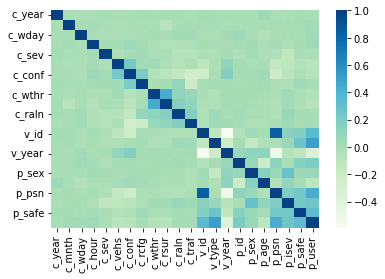

In [ ]:
corr = pd.DataFrame(datacambio).corr()
sns.heatmap(corr, cmap="GnBu")

Extraemos de la matriz de correlación unicamente los datos enfrentados a la variable c_sev, para así poder observar en que medida afectan todas las variables a los fallecimientos.
como podemos obsrervar, las que mas contribuyen a los fallecimientos son p_isev, c_traf y c_raln

In [ ]:
Correlationseveridad = Correlation['c_sev']
Correlationseveridad = abs(Correlationseveridad)
Correlationseveridad.sort_values(ascending = False)

c_sev     1.000000
p_isev    0.134780
c_traf    0.060905
c_raln    0.059322
p_id      0.031769
v_type    0.027969
p_psn     0.027770
c_rcfg    0.027682
p_sex     0.021320
c_conf    0.020953
p_age     0.019447
v_id      0.019447
p_user    0.018691
c_wthr    0.018498
c_wday    0.018195
c_hour    0.018129
c_vehs    0.017820
p_safe    0.009124
v_year    0.008976
c_rsur    0.007126
c_mnth    0.005877
c_year    0.005515
Name: c_sev, dtype: float64

# 5. Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

##5.1 Predicción de fallecimientos

Lo que buscamos es, según el tipo de la colisión, si esta será o no mortal, para ello extraemos las variables configuración, c_conf y fallecimiento c_sev, agrupadas mediante un group by, para así poder saber segun cada tipo de accidente, ver el numero de accidentes mortales y no mortales

In [ ]:
fallecimiento = data.loc[:,['c_conf','c_sev']]
fatal = fallecimiento.groupby(['c_conf','c_sev']).size().unstack()
fatal.index = fatal.index.astype(str)
fatal

c_sev,1,2
c_conf,,
0,7829,456170
1,2917,89513
2,4605,182330
3,6563,158847
4,7430,206920
5,325,12724
6,13104,502364
21,6513,1764699
22,2636,194370


Una vez que obtenemos estos datos, hemos creado un plot detallado, en el que tenemos en el eje de las x el tipo de colisión y en el de las y en número total de cada tipo de colisión.
por último, mediante un xlim calculamos y representamos el % de mortalidad en cada tipo de colisión

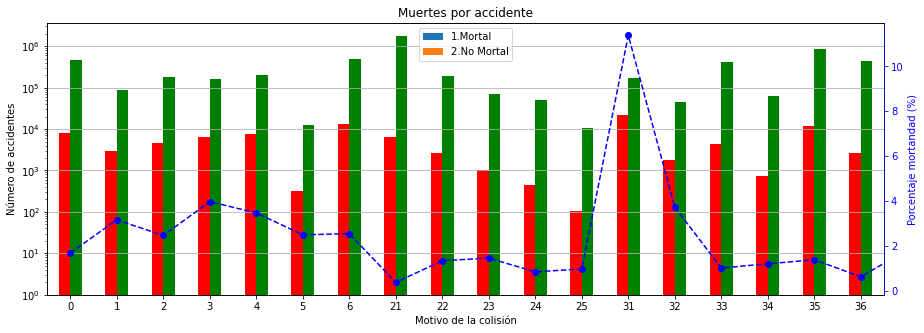

In [ ]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal.plot(kind='bar',rot=30,log=True,style='o--',figsize=(12,6),ax=ax1)
fatal.plot(kind='bar',rot=0,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por accidente', ax=ax1)
ax1.set_ylabel('Número de accidentes')
ax1.set_xlabel('Motivo de la colisión')
ax1.grid(axis='y')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal[1]/(fatal[1]+fatal[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')
plt.xlim(-0.5,17.5);

##5.2 Necesidad de tratamiento medico

In [ ]:
Correlationmedico = Correlation['p_isev']
Correlationmedico = abs(Correlationmedico)
Correlationmedico.sort_values(ascending = False)


p_isev    1.000000
p_sex     0.279882
p_user    0.254737
p_safe    0.246589
p_psn     0.189598
v_id      0.135430
c_sev     0.134780
c_vehs    0.119426
p_age     0.098340
c_conf    0.090619
v_year    0.079331
c_raln    0.074017
v_type    0.073823
c_traf    0.050004
c_hour    0.029675
c_rcfg    0.028395
c_rsur    0.025668
c_wthr    0.023577
c_year    0.020264
p_id      0.007951
c_wday    0.005447
c_mnth    0.001774
Name: p_isev, dtype: float64

# 6. Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

Ralizamos lo mismo que en el ejercicio 5, para todas las variables que hemos elegido enfrentarlas y relacionarlas de forma gráfica a la mortalidad de los accidentes mediante el mismo sistema, enfrentando en la x la variable cambiante estudiada en cada uno de los apartados, en la y el número total de accidentes y aplicando el % de mortalidad para cada uno de ellos. Las variables a estudiar y enfrentar a c_sev son:
c_raln o tipo de carretera
v_type o tipo de vehiculo
v_year o año del vehiculo
p_age o edad del accidentado
p_sex o sexo del accidentado
p_psn o posición del accidentado

##6.1 Fallecimientos por tipo de carretera

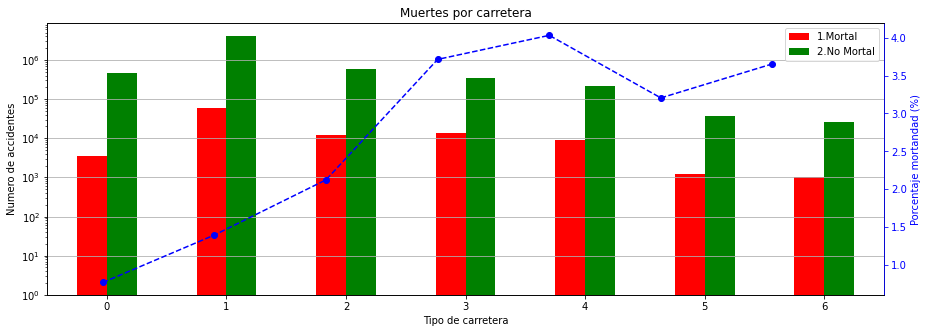

In [ ]:
carretera = data.loc[:,['c_raln','c_sev']]
fatal1 = carretera.groupby(['c_raln','c_sev']).size().unstack()

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal1.plot(kind='bar',rot=0,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por carretera', ax=ax1)
ax1.set_ylabel('Numero de accidentes')
ax1.set_xlabel('Tipo de carretera')
ax1.grid(axis='y')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal1[1]/(fatal1[1]+fatal1[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,8));

##6.2 Fallecimientos por tipo de vehículo

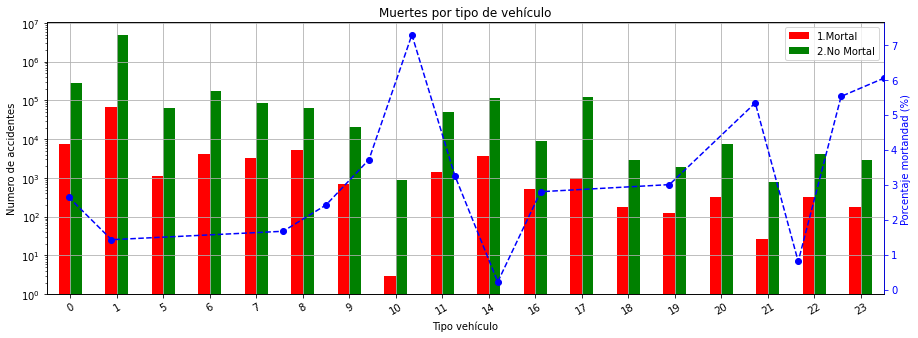

In [ ]:
vehículo = data.loc[:,['v_type','c_sev']]
fatal2 = vehículo.groupby(['v_type','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal2.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por tipo de vehículo', ax=ax1)
ax1.set_xlabel('Tipo vehículo')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal2[1]/(fatal2[1]+fatal2[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,20));

##6.3 Fallecimientos por antigüedad del vehículo

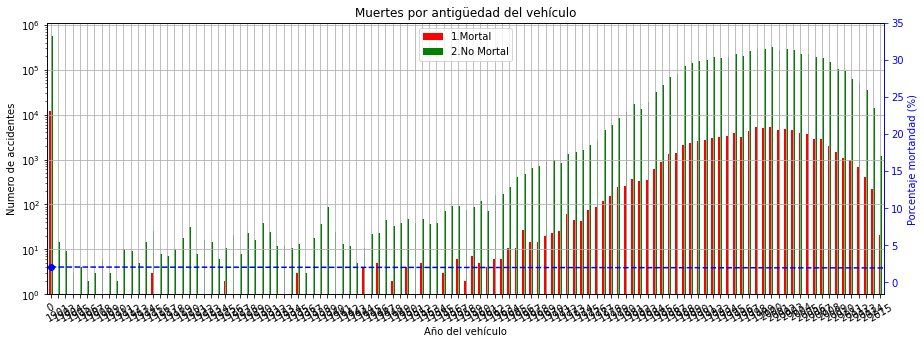

In [ ]:
vehículoyear = data.loc[:,['v_year','c_sev']]
fatal3 = vehículoyear.groupby(['v_year','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal3.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por antigüedad del vehículo', ax=ax1)
ax1.set_xlabel('Año del vehículo')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal3[1]/(fatal3[1]+fatal3[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,115));

##6.4 Fallecimientos por edad del conductor

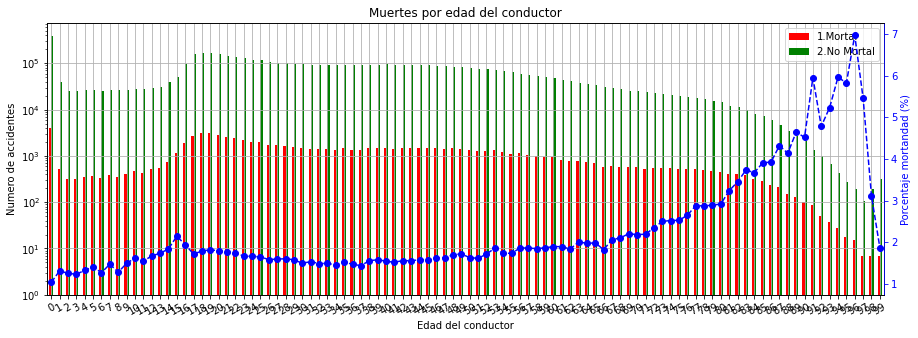

In [ ]:
ageconductor = data.loc[:,['p_age','c_sev']]
fatal4 = ageconductor.groupby(['p_age','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal4.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por edad del conductor', ax=ax1)
ax1.set_xlabel('Edad del conductor')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal4[1]/(fatal4[1]+fatal4[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,100));

##6.5 Fallecimientos por sexo del conductor

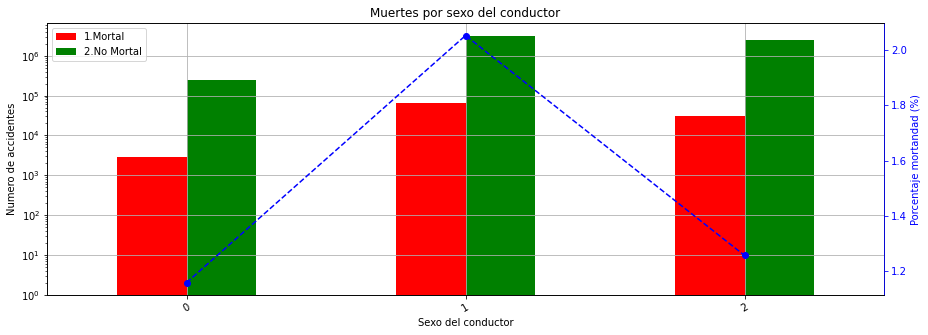

In [ ]:
sexconductor = data.loc[:,['p_sex','c_sev']]
fatal5 = sexconductor.groupby(['p_sex','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal5.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por sexo del conductor', ax=ax1)
ax1.set_xlabel('Sexo del conductor')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal5[1]/(fatal5[1]+fatal5[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,3));

##6.6 Fallecimientos por posición de los pasajeros

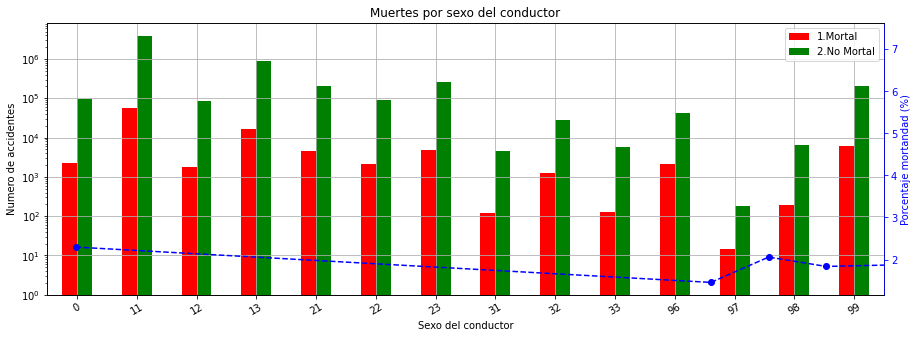

In [ ]:
positionconductor = data.loc[:,['p_psn','c_sev']]
fatal6 = positionconductor.groupby(['p_psn','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal6.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por sexo del conductor', ax=ax1)
ax1.set_xlabel('Sexo del conductor')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal6[1]/(fatal6[1]+fatal6[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,15));

# 7. Plus: complementar con datos abiertos de clima (aunque Canadá es muy grande) y de otra tipología, ¿hay algún tipo de relación con temperaturas medias, precipitación media del día/mes, nieve...? ¿a más días festivos o de vacaciones, más accidentes? etc. 

## 7.1 Accidentes según el año

Realizamos un plot en el que enfrentamos y relacionamos los accidentes por año, c_year y los accidentes con fallecimiento, c_sev.
Gráficamente representamos en el eje de las x el año y en el de las y numero de accidentes representando en naranja los que son mortales y en verde los que no.

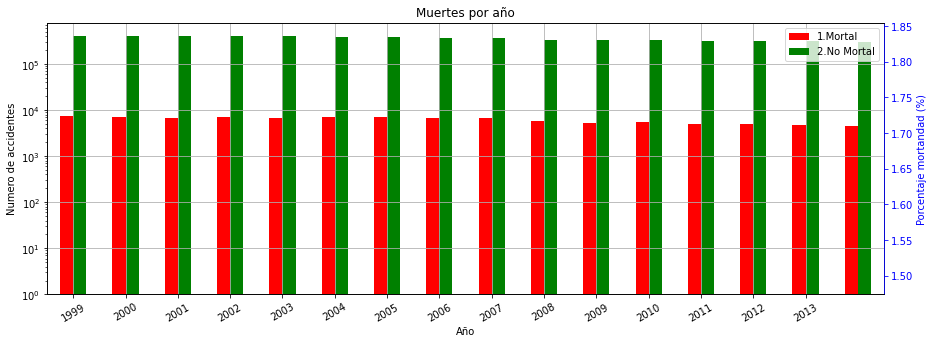

In [ ]:
año = data.loc[:,['c_year','c_sev']]
fatal7 = año.groupby(['c_year','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal7.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por año', ax=ax1)
ax1.set_xlabel('Año')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal7[1]/(fatal7[1]+fatal7[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,15));

## 7.2 Accidentes según el mes

Realizamos un plot en el que enfrentamos y relacionamos los accidentes por mes, c_mnth y los accidentes con fallecimiento, c_sev.
Gráficamente representamos en el eje de las x el mes y en el de las y numero de accidentes representando en naranja los que son mortales y en verde los que no. con el % de cuantos de ellos son mortales. Destacable los meses de verano

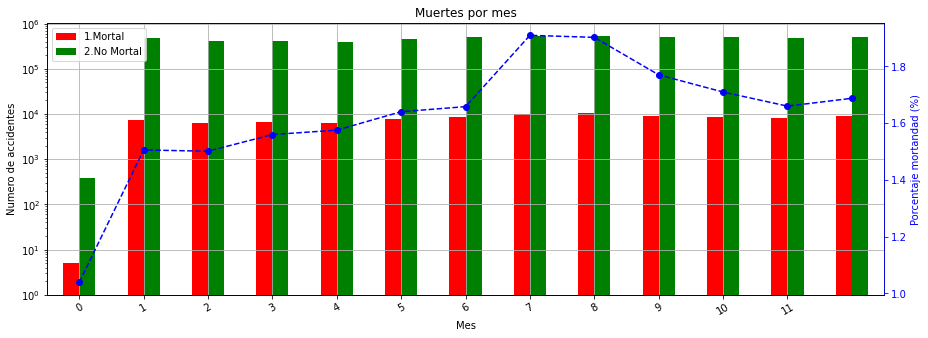

In [ ]:
mes = data.loc[:,['c_mnth','c_sev']]
fatal8 = mes.groupby(['c_mnth','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal8.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por mes', ax=ax1)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal8[1]/(fatal8[1]+fatal8[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,12));

## 7.3 Accidentes según el día de la semana

Realizamos un plot en el que enfrentamos y relacionamos los accidentes por día de la semana, c_wday y los accidentes con fallecimiento, c_sev.
Gráficamente representamos en el eje de las x el día y en el de las y número de accidentes representando en naranja los que son mortales y en verde los que no. con el % de cuantos de ellos son mortales. Destacable los fines de semana

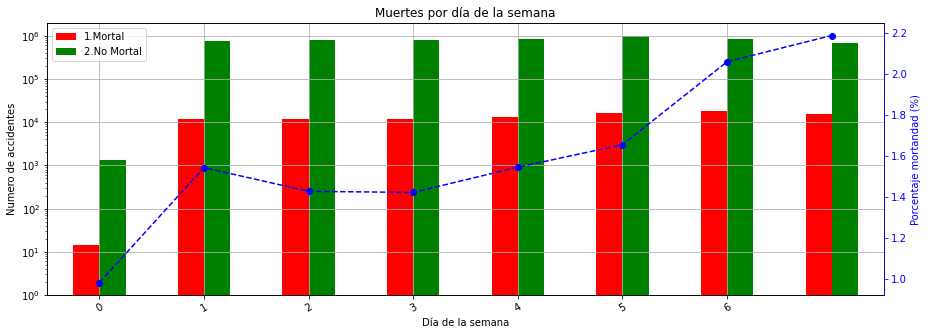

In [ ]:
day = data.loc[:,['c_wday','c_sev']]
fatal9 = day.groupby(['c_wday','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal9.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por día de la semana', ax=ax1)
ax1.set_xlabel('Día de la semana')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal9[1]/(fatal9[1]+fatal9[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,7));

## 7.4 Accidente según la hora

Realizamos un plot en el que enfrentamos y relacionamos los accidentes por hora del día, c_hour y los accidentes con fallecimiento, c_sev.
Gráficamente representamos en el eje de las x la hora y en el de las y número de accidentes representando en naranja los que son mortales y en verde los que no. con el % de cuantos de ellos son mortales. Destacable las horas nocturnas

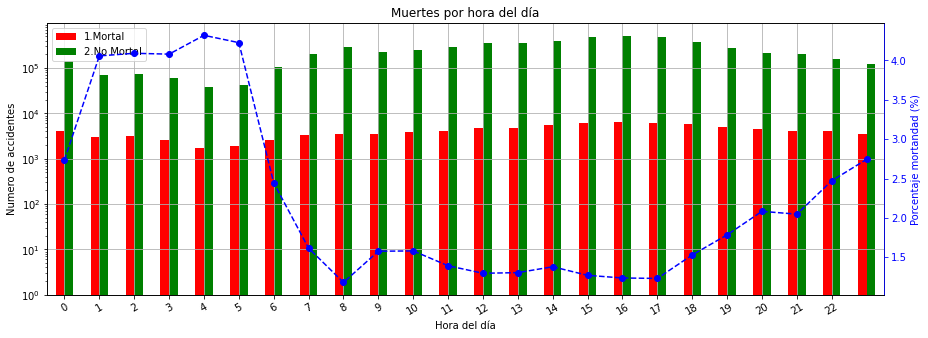

In [ ]:
hour = data.loc[:,['c_hour','c_sev']]
fatal10 = hour.groupby(['c_hour','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal10.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por hora del día', ax=ax1)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal10[1]/(fatal10[1]+fatal10[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,23));

## 7.5 Accidente según el clima clima

Realizamos un plot en el que enfrentamos y relacionamos los accidentes según el clima, c_wthr y los accidentes con fallecimiento, c_sev.
Gráficamente representamos en el eje de las x el clima y en el de las y número de accidentes representando en naranja los que son mortales y en verde los que no. con el % de cuantos de ellos son mortales.

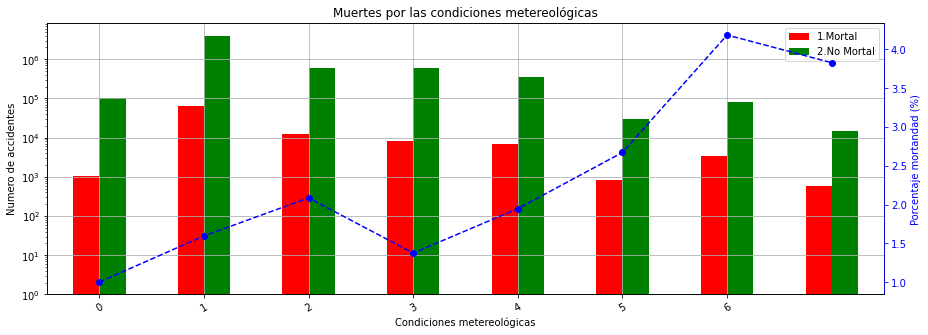

In [ ]:
clima = data.loc[:,['c_wthr','c_sev']]
fatal11 = clima.groupby(['c_wthr','c_sev']).size().unstack().fillna(0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

fatal11.plot(kind='bar',rot=30,log=True,color=['red','green'],figsize=(15,5),
         title='Muertes por las condiciones metereológicas', ax=ax1)
ax1.set_xlabel('Condiciones metereológicas')
ax1.set_ylabel('Numero de accidentes')
ax1.grid(axis='both')
ax1.legend(['1.Mortal','2.No Mortal'])

se1 = fatal11[1]/(fatal11[1]+fatal11[2])*100
se1.plot(c='b', style='o--', ax=ax2)
ax2.set_ylabel('Porcentaje mortandad (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

plt.xticks(np.arange(0,7));

## 7.6 Todas las condiciones

Mediante un group.by juntamos todas estas variables, para hacer ahora un plot conjunto y tener una visión global de todos los accidentes según estas caracteristicas.

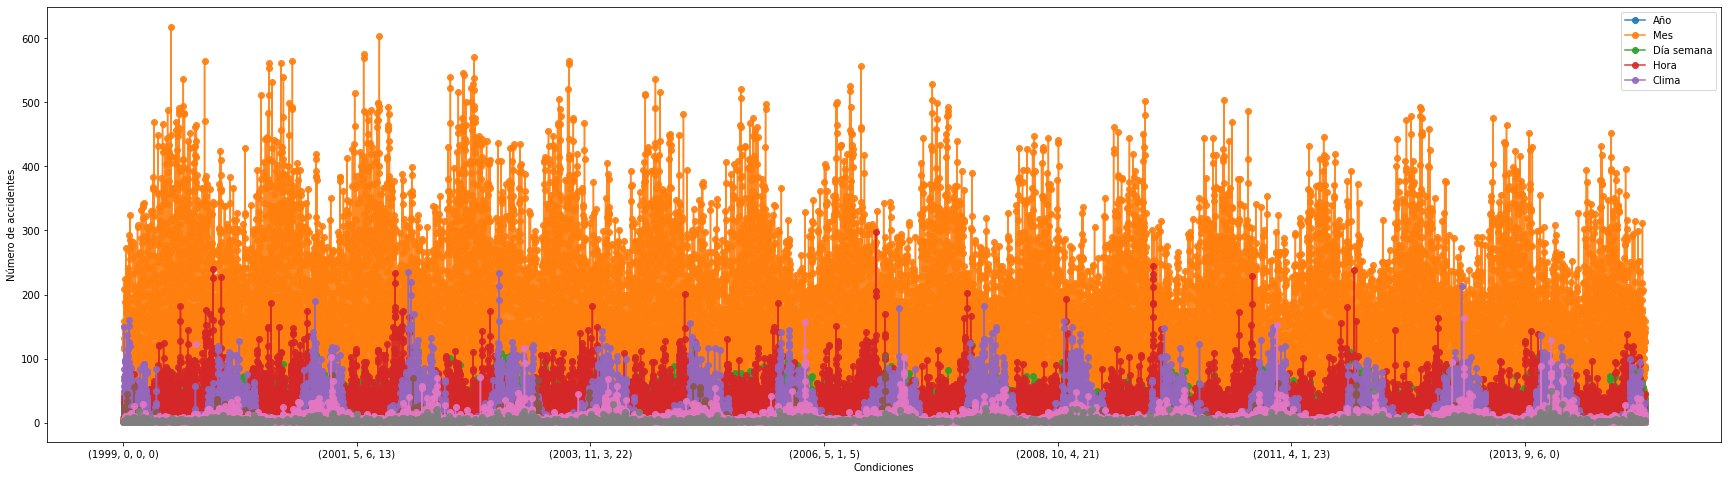

In [ ]:
todo = data.groupby(['c_year','c_mnth','c_wday','c_hour','c_wthr']).size().unstack()
todo.plot(figsize=(30,8),style='o-',alpha=0.9)

plt.xlabel('Condiciones')
plt.ylabel('Número de accidentes')
plt.legend(['Año','Mes','Día semana','Hora', 'Clima'])